In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/iMM904.json', 'r') as file:
    models = json.loads(file.read())

## Data Inspection

In [4]:
type(models)

dict

In [5]:
len(models)

6

In [6]:
models.keys()

dict_keys(['metabolites', 'reactions', 'genes', 'id', 'compartments', 'version'])

In [7]:
models['id']

'iMM904'

In [8]:
models['version']

'1'

In [9]:
models['compartments']

{'c': 'cytosol',
 'e': 'extracellular space',
 'g': 'golgi apparatus',
 'm': 'mitochondria',
 'n': 'nucleus',
 'r': 'endoplasmic reticulum',
 'v': 'vacuole',
 'x': 'peroxisome/glyoxysome'}

In [10]:
models['reactions'][:2]

[{'id': 'CITtcp',
  'name': 'Citrateisocitrate antiport into peroxisome',
  'metabolites': {'cit_c': -1.0, 'cit_x': 1.0, 'icit_c': 1.0, 'icit_x': -1.0},
  'lower_bound': -999999.0,
  'upper_bound': 999999.0,
  'gene_reaction_rule': '',
  'subsystem': 'S_Transport__Peroxisomal',
  'notes': {'original_bigg_ids': ['CITtcp']},
  'annotation': {'bigg.reaction': ['CITtcp'],
   'metanetx.reaction': ['MNXR96755'],
   'sbo': 'SBO:0000185',
   'seed.reaction': ['rxn09777', 'rxn09861']}},
 {'id': '13BGH',
  'name': 'Endo 1 3 beta glucan glucohydrase',
  'metabolites': {'13BDglcn_c': -1.0, 'glc__D_c': 1.0, 'h2o_c': -1.0},
  'lower_bound': 0.0,
  'upper_bound': 999999.0,
  'gene_reaction_rule': 'YGR282C',
  'subsystem': 'S_Starch_and_Sucrose_Metabolism',
  'notes': {'original_bigg_ids': ['13BGH']},
  'annotation': {'bigg.reaction': ['13BGH'],
   'metanetx.reaction': ['MNXR94686'],
   'sbo': 'SBO:0000176'}}]

In [11]:
models['metabolites'][:2]

[{'id': '2dr5p_c',
  'name': '2-Deoxy-D-ribose 5-phosphate',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C5H9O7P',
  'notes': {'original_bigg_ids': ['2dr5p_c']},
  'annotation': {'bigg.metabolite': ['2dr5p'],
   'biocyc': ['META:DEOXY-RIBOSE-5P'],
   'chebi': ['CHEBI:40516',
    'CHEBI:16132',
    'CHEBI:40921',
    'CHEBI:55513',
    'CHEBI:57651',
    'CHEBI:19559',
    'CHEBI:40923',
    'CHEBI:62877',
    'CHEBI:11566',
    'CHEBI:1082',
    'CHEBI:42055'],
   'hmdb': ['HMDB01031'],
   'inchi_key': ['ALQNUOMIEBHXQG-CRCLSJGQSA-L'],
   'kegg.compound': ['C00673'],
   'metanetx.chemical': ['MNXM2179'],
   'reactome.compound': ['6787328'],
   'sabiork': ['1346'],
   'sbo': 'SBO:0000247',
   'seed.compound': ['cpd26846', 'cpd00510']}},
 {'id': '2hb_c',
  'name': '2 Hydroxybutyrate C4H7O3',
  'compartment': 'c',
  'charge': -1,
  'formula': 'C4H7O3',
  'notes': {'original_bigg_ids': ['2hb_c']},
  'annotation': {'bigg.metabolite': ['2hb'],
   'biocyc': ['META:CPD-3564'],
   'chebi

## 'gene reaction rule' in 'reactions'

In [12]:
for i, reaction in enumerate(models['reactions']):
    if i < 60:
        print(reaction['gene_reaction_rule'])
    else:
        break
        


YGR282C
YOR190W or YDR261C or YLR300W
((YCR034W and YGR032W) and YLR343W) or ((YCR034W and YGR032W) and YMR215W) or ((YCR034W and YMR306W) and YMR215W) or ((YCR034W and YLR342W) and YOL132W) or ((YCR034W and YMR306W) and YOL132W) or ((YCR034W and YGR032W) and YOL030W) or ((YCR034W and YLR342W) and YOL030W) or ((YCR034W and YMR306W) and YOL030W) or ((YCR034W and YLR342W) and YLR343W) or ((YCR034W and YMR306W) and YLR343W) or ((YCR034W and YGR032W) and YOL132W) or ((YCR034W and YLR342W) and YMR215W) or ((YCR034W and YGR032W) and YMR307W) or ((YCR034W and YLR342W) and YMR307W) or ((YCR034W and YMR306W) and YMR307W)
YPR159W or YGR143W
YGR247W


YHR044C or YHR043C


YOL096C and YDR204W and YML110C and YGR255C and YOR125C and YGL119W and YLR201C
YOL096C and YDR204W and YML110C and YGR255C and YOR125C and YGL119W and YLR201C
YOL096C and YDR204W and YML110C and YGR255C and YOR125C and YGL119W and YLR201C
YOL096C and YDR204W and YML110C and YGR255C and YOR125C and YGL119W and YLR201C






YIL

From above, we see that some reactions are ruled by some genes, and some reactions are not ruled by any gene.

## look at a spefic reaction and compare data to its web infomation

In [13]:
# http://bigg.ucsd.edu/models/iND750/reactions/13BGH
for reaction in models['reactions']:
    if reaction['id'] == '13BGH':
        print(reaction)

{'id': '13BGH', 'name': 'Endo 1 3 beta glucan glucohydrase', 'metabolites': {'13BDglcn_c': -1.0, 'glc__D_c': 1.0, 'h2o_c': -1.0}, 'lower_bound': 0.0, 'upper_bound': 999999.0, 'gene_reaction_rule': 'YGR282C', 'subsystem': 'S_Starch_and_Sucrose_Metabolism', 'notes': {'original_bigg_ids': ['13BGH']}, 'annotation': {'bigg.reaction': ['13BGH'], 'metanetx.reaction': ['MNXR94686'], 'sbo': 'SBO:0000176'}}


The useful attribute here is *'metabolites'*, 

In [14]:
for gene in models['genes']:
    if gene['id'] == 'YGR282C':
        print(gene)

{'id': 'YGR282C', 'name': 'BGL2', 'notes': {'original_bigg_ids': ['YGR282C']}, 'annotation': {'ncbigene': ['853199'], 'refseq_locus_tag': ['YGR282C'], 'refseq_name': ['BGL2'], 'refseq_synonym': ['SCW9'], 'sbo': 'SBO:0000243', 'sgd': ['S000003514']}}


## Data Preparation

In [15]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [21]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    # exclude inorganic metabolites
                    try:
                        if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                            if v > 0 and metabolite not in genes[gene['id']]['products']:
                                genes[gene['id']]['products'].append(metabolite)
                            if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                genes[gene['id']]['substrates'].append(metabolite)
                        elif metabolite not in inorganics:
                            inorganics.append(metabolite)
                        else:
                            break
                    except KeyError:
                        print(m)
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [22]:
inorganics

['glyald_c',
 'glyc_c',
 'h_c',
 'nadp_c',
 'nadph_c',
 'abt_c',
 'arab__L_c',
 'lald__L_c',
 'mthgxl_c',
 'glc__D_c',
 'sbt__D_c',
 'xyl__D_c',
 'xylt_c',
 '2mbald_c',
 '2mbtoh_c',
 '13BDglcn_c',
 'h2o_c',
 'nad_c',
 'nadh_c',
 '2mppal_c',
 'ibutoh_c',
 '3mbald_c',
 'iamoh_c',
 '2phetoh_c',
 'pacald_c',
 'id3acald_c',
 'ind3eth_c',
 'acald_c',
 'etoh_c',
 '13BDglcn_e',
 'glc__D_e',
 'h2o_e',
 'cyst__L_c',
 'hcys__L_c',
 'nh4_c',
 'pyr_c',
 'cyst__L_x',
 'h2o_x',
 'hcys__L_x',
 'nh4_x',
 'pyr_x',
 'Sfglutth_c',
 'fald_c',
 'gthrd_c',
 'udp_c',
 'udpg_c',
 'amp_c',
 'atp_c',
 'cys__L_c',
 'cystrna_c',
 'ppi_c',
 'trnacys_c',
 'ser__L_c',
 'co2_c',
 'coa_c',
 'malcoa_c',
 'ocdca_c',
 'ttc_c',
 'hexc_c',
 'cys__L_e',
 'h_e',
 'ile__L_c',
 'ile__L_e',
 'leu__L_c',
 'leu__L_e',
 'met__L_c',
 'met__L_e',
 'phe__L_c',
 'phe__L_e',
 'val__L_c',
 'val__L_e',
 'trp__L_c',
 'trp__L_e',
 'tyr__L_c',
 'tyr__L_e',
 '2mbald_m',
 '2mbtoh_m',
 'h_m',
 'nad_m',
 'nadh_m',
 '2mppal_m',
 'ibutoh_m',
 '3mb

In [23]:
df = pd.DataFrame.from_dict(genes).T
df

,reactions,substrates,products,links
YHR104W,"[ALCD19y, ARABR, LALDO3, SBTR, XYLR]","[glyald_c, h_c, nadph_c, arab__L_c, mthgxl_c, ...","[glyc_c, nadp_c, abt_c, lald__L_c, sbt__D_c, x...","[YOR120W, YLL043W, YHL032C, YPL061W, YBR149W, ..."
YDR368W,"[ALCD19y, ALCD22yi]","[glyald_c, h_c, nadph_c, 2mbald_c]","[glyc_c, nadp_c, 2mbtoh_c]","[YOR120W, YLL043W, YHL032C, YPL061W, YBR149W, ..."
YGR282C,[13BGH],"[13BDglcn_c, h2o_c]",[glc__D_c],"[YHR104W, YGL253W, YFR053C, YCL040W]"
YOL086C,"[ALCD22xi, ALCD23xi, ALCD24xi, ALCD25xi, ALCD2...","[2mbald_c, h_c, nadh_c, 2mppal_c, 3mbald_c, pa...","[2mbtoh_c, nad_c, ibutoh_c, iamoh_c, 2phetoh_c...","[YOR377W, YGR177C, YDL168W, YMR303C, YMR170C, ..."
YLR300W,[13BGHe],"[13BDglcn_e, h2o_e]",[glc__D_e],"[YEL069C, YDR342C, YOL156W, YHR096C, YNR072W, ..."
...,...,...,...,...
YOR377W,"[OHACT1, OHACT2, OHACT3, OHACT4, OHACT5]","[accoa_c, etoh_c, iamoh_c, 2mbtoh_c, ibutoh_c,...","[aces_c, coa_c, iamac_c, 2mbac_c, ibutac_c, ph...","[YOR126C, YLR153C, YIL009W, YOR317W, YMR246W, ..."
YGR177C,"[OHACT1, OHACT2, OHACT3, OHACT4, OHACT5]","[accoa_c, etoh_c, iamoh_c, 2mbtoh_c, ibutoh_c,...","[aces_c, coa_c, iamac_c, 2mbac_c, ibutac_c, ph...","[YOR126C, YLR153C, YIL009W, YOR317W, YMR246W, ..."
YOR184W,"[OHPBAT, PSERT]","[glu__L_c, ohpb_c, 3php_c]","[akg_c, phthr_c, pser__L_c]","[YGR019W, YLR027C, YDR111C, YLR438W, YGL202W, ..."
YEL021W,[OMPDC],"[h_c, orot5p_c]","[co2_c, ump_c]","[YNR057C, YOR128C, YKL024C, YGL224C]"


In [24]:
True in df.index.str.contains('YDL157C')

False

In [25]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

,index,links
0,YHR104W,YOR120W
1,YHR104W,YLL043W
2,YHR104W,YHL032C
3,YHR104W,YPL061W
4,YHR104W,YBR149W
...,...,...
80828,YEL021W,YGL224C
80829,YKL184W,YNR057C
80830,YKL184W,YOR128C
80831,YKL184W,YKL174C


In [26]:
# show genes having no links
print(df.loc[df['links'].str.len() == 0])

                      reactions                    substrates  \
YGL184C                [CYSTLp]            [cyst__L_x, h2o_x]   
YGR247W               [23CAPPD]        [23camp_c, h2o_c, h_c]   
YJR153W             [EPGALURSe]             [h2o_e, pectin_e]   
YGL012W              [C24STRer]   [ergtetrol_r, h_r, nadph_r]   
YLR299W                 [GTMLT]           [ala__L_c, gthrd_c]   
YDL182W                [HCITSn]       [accoa_n, akg_n, h2o_n]   
YDL131W                [HCITSn]       [accoa_n, akg_n, h2o_n]   
YIL099W               [GLCGSDv]           [glycogen_v, h2o_v]   
YPR026W                 [TREHv]                [h2o_v, tre_v]   
YPL244C             [UDPGALt2g]                    [udpgal_c]   
YGR170W  [PSERDg_SC, PSERDv_SC]  [h_g, ps_SC_g, h_v, ps_SC_v]   
YNL169C             [PSERDm_SC]                [h_m, ps_SC_m]   
YPL092W                 [SO3ti]                       [so3_c]   
YGR096W              [THMPPt2m]                     [thmpp_c]   
YBR180W              [NFO

In [27]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [28]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [29]:
giant = max(connected_component_subgraphs(G), key=len)

In [30]:
giant.number_of_nodes()

904

## Laplacian and Eigen

In [31]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes()))
L.todense()

matrix([[218,  -1,  -1, ...,   0,  -1,   0],
        [ -1, 396,   0, ...,   0,  -1,   0],
        [ -1,   0, 396, ...,   0,  -1,   0],
        ...,
        [  0,   0,   0, ...,  68,   0,  -1],
        [ -1,  -1,  -1, ...,   0, 223,   0],
        [  0,   0,   0, ...,  -1,   0, 150]], dtype=int64)

In [32]:
eig = np.linalg.eig(L.todense())
eig

(array([5.73044641e+02+0.00000000e+00j, 5.54039561e+02+0.00000000e+00j,
        5.69072725e+02+0.00000000e+00j, 5.46037508e+02+0.00000000e+00j,
        5.40045289e+02+0.00000000e+00j, 5.39047193e+02+0.00000000e+00j,
        5.73000000e+02+0.00000000e+00j, 5.69000000e+02+0.00000000e+00j,
        5.01539225e+02+0.00000000e+00j, 4.97951484e+02+0.00000000e+00j,
        4.86586007e+02+0.00000000e+00j, 4.74059974e+02+0.00000000e+00j,
        4.70070893e+02+0.00000000e+00j, 4.69065895e+02+0.00000000e+00j,
        4.68103750e+02+0.00000000e+00j, 4.68014559e+02+0.00000000e+00j,
        4.31152772e+02+0.00000000e+00j, 4.23429880e+02+0.00000000e+00j,
        4.20334189e+02+0.00000000e+00j, 4.18290424e+02+0.00000000e+00j,
        4.29000000e+02+0.00000000e+00j, 4.29000000e+02+0.00000000e+00j,
        4.13653809e+02+0.00000000e+00j, 4.14997274e+02+0.00000000e+00j,
        4.12812764e+02+0.00000000e+00j, 4.10998448e+02+0.00000000e+00j,
        4.10300729e+02+0.00000000e+00j, 4.08161866e+02+0.0000000

## Plotting

In [33]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
#     plt.colorbar(sm)
#     plt.title('k = {}'.format(k))

In [34]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [35]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [36]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot

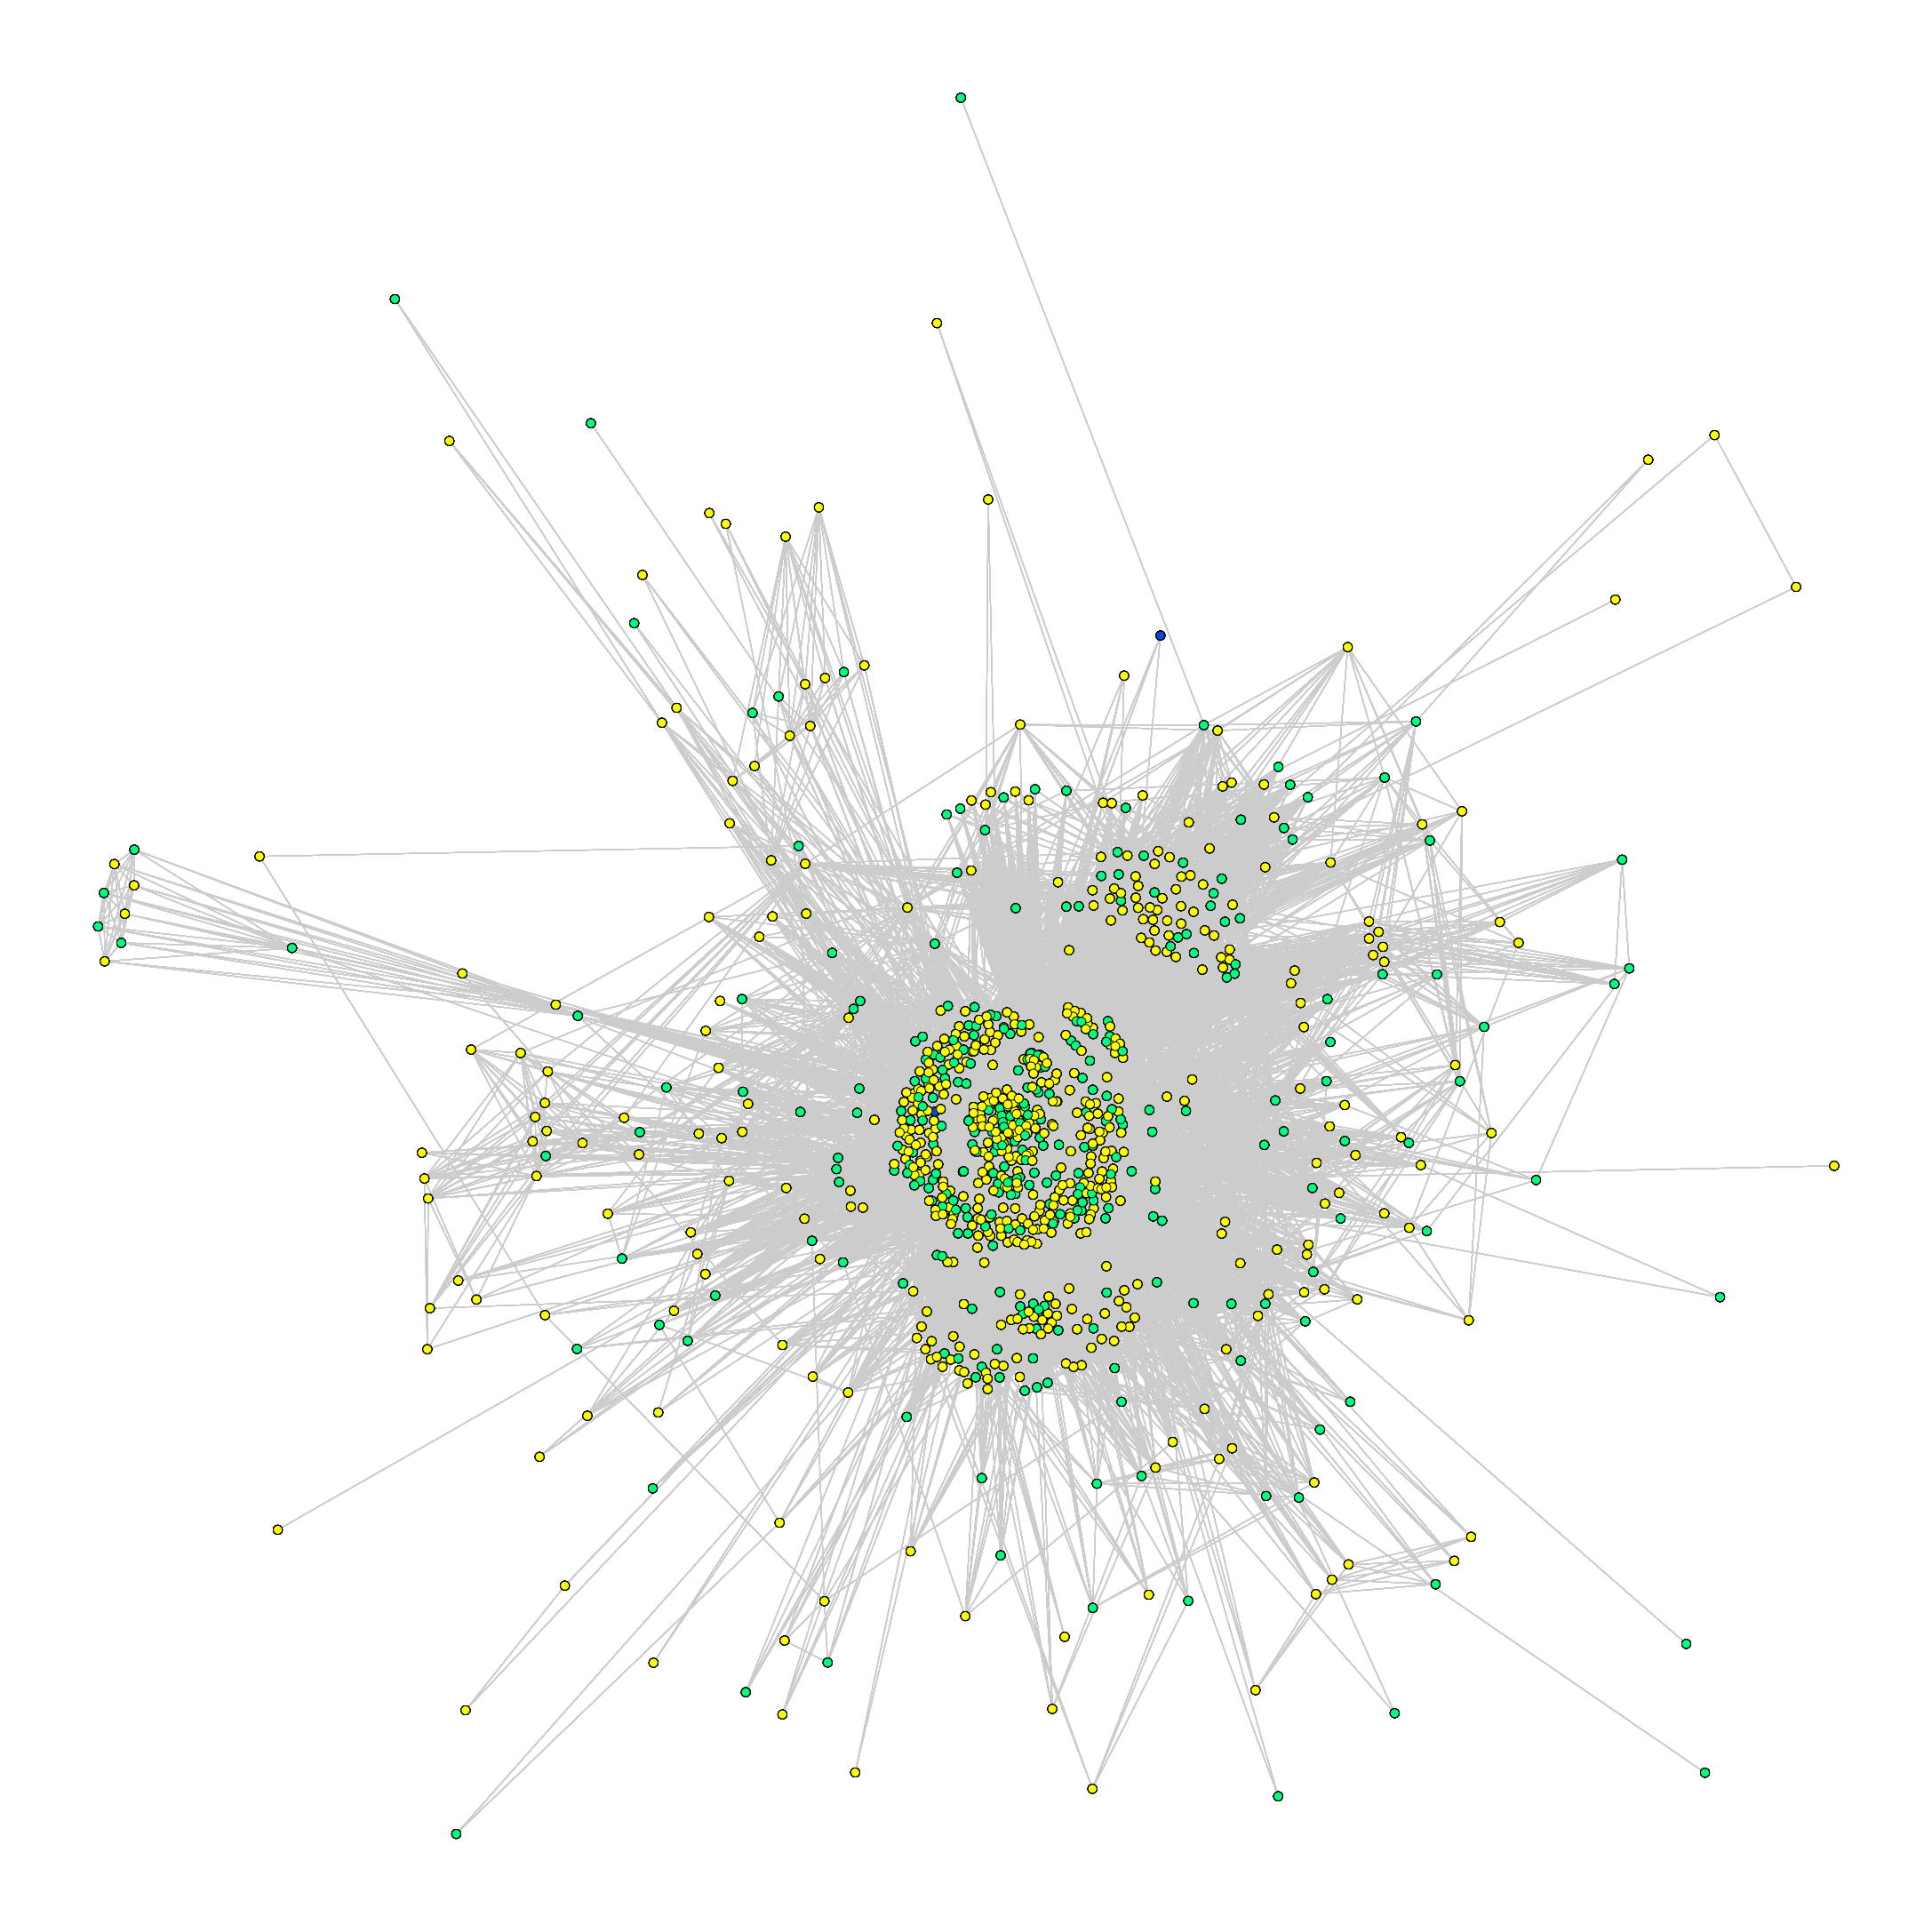

In [42]:
n0 = 4
n_sub = n0 ** 2
base = len(eig[0]) // (n_sub - 2)
k_lst0 = [0, 1]
k_lst1 = [x * base for x in range(1, n_sub-2)]
k_lst2 = [len(eig[0])-1]
k_lst = k_lst0 + k_lst1 + k_lst2
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
#     plt.subplot(n0, n0, i+1)
    draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
    plt.savefig('../output/{}.png'.format(k))
# plt.tight_layout()
# plt.show()

## Size vs index

In [43]:
import os
import collections
f_name = os.listdir('../output/')
f_name = [str(pre)+'.png' for pre in sorted([int(os.path.splitext(f)[0]) for f in f_name if '.png' in f])]
size_dict = dict()
for f in f_name:
    size_dict[os.path.splitext(f)[0]] = os.path.getsize('../output/{}'.format(f))
size_dict

{'0': 1363890,
 '1': 1244790,
 '64': 1119933,
 '128': 1034543,
 '192': 950462,
 '256': 901813,
 '320': 851431,
 '384': 821928,
 '448': 786279,
 '512': 757254,
 '576': 742700,
 '640': 717390,
 '704': 702733,
 '768': 687181,
 '832': 673467,
 '903': 648884}

In [44]:
index_lst = [int(i)/len(eig[1]) for i in list(size_dict.keys())]
index_lst

[0.0,
 0.0011061946902654867,
 0.07079646017699115,
 0.1415929203539823,
 0.21238938053097345,
 0.2831858407079646,
 0.35398230088495575,
 0.4247787610619469,
 0.49557522123893805,
 0.5663716814159292,
 0.6371681415929203,
 0.7079646017699115,
 0.7787610619469026,
 0.8495575221238938,
 0.9203539823008849,
 0.9988938053097345]

In [45]:
size_lst = list(size_dict.values())
s_lst = [s - min(size_lst) for s in size_lst]
s_lst = [s / max(s_lst) for s in s_lst]
s_lst

[1.0,
 0.8334279712338079,
 0.6588042617824186,
 0.5393786905284711,
 0.4217838731423233,
 0.3537438846667021,
 0.2832801403065149,
 0.2420175495030811,
 0.1921592266358604,
 0.15156516169095086,
 0.1312100877475154,
 0.09581178339762184,
 0.07531265471898138,
 0.05356178829268565,
 0.03438152966548533,
 0.0]

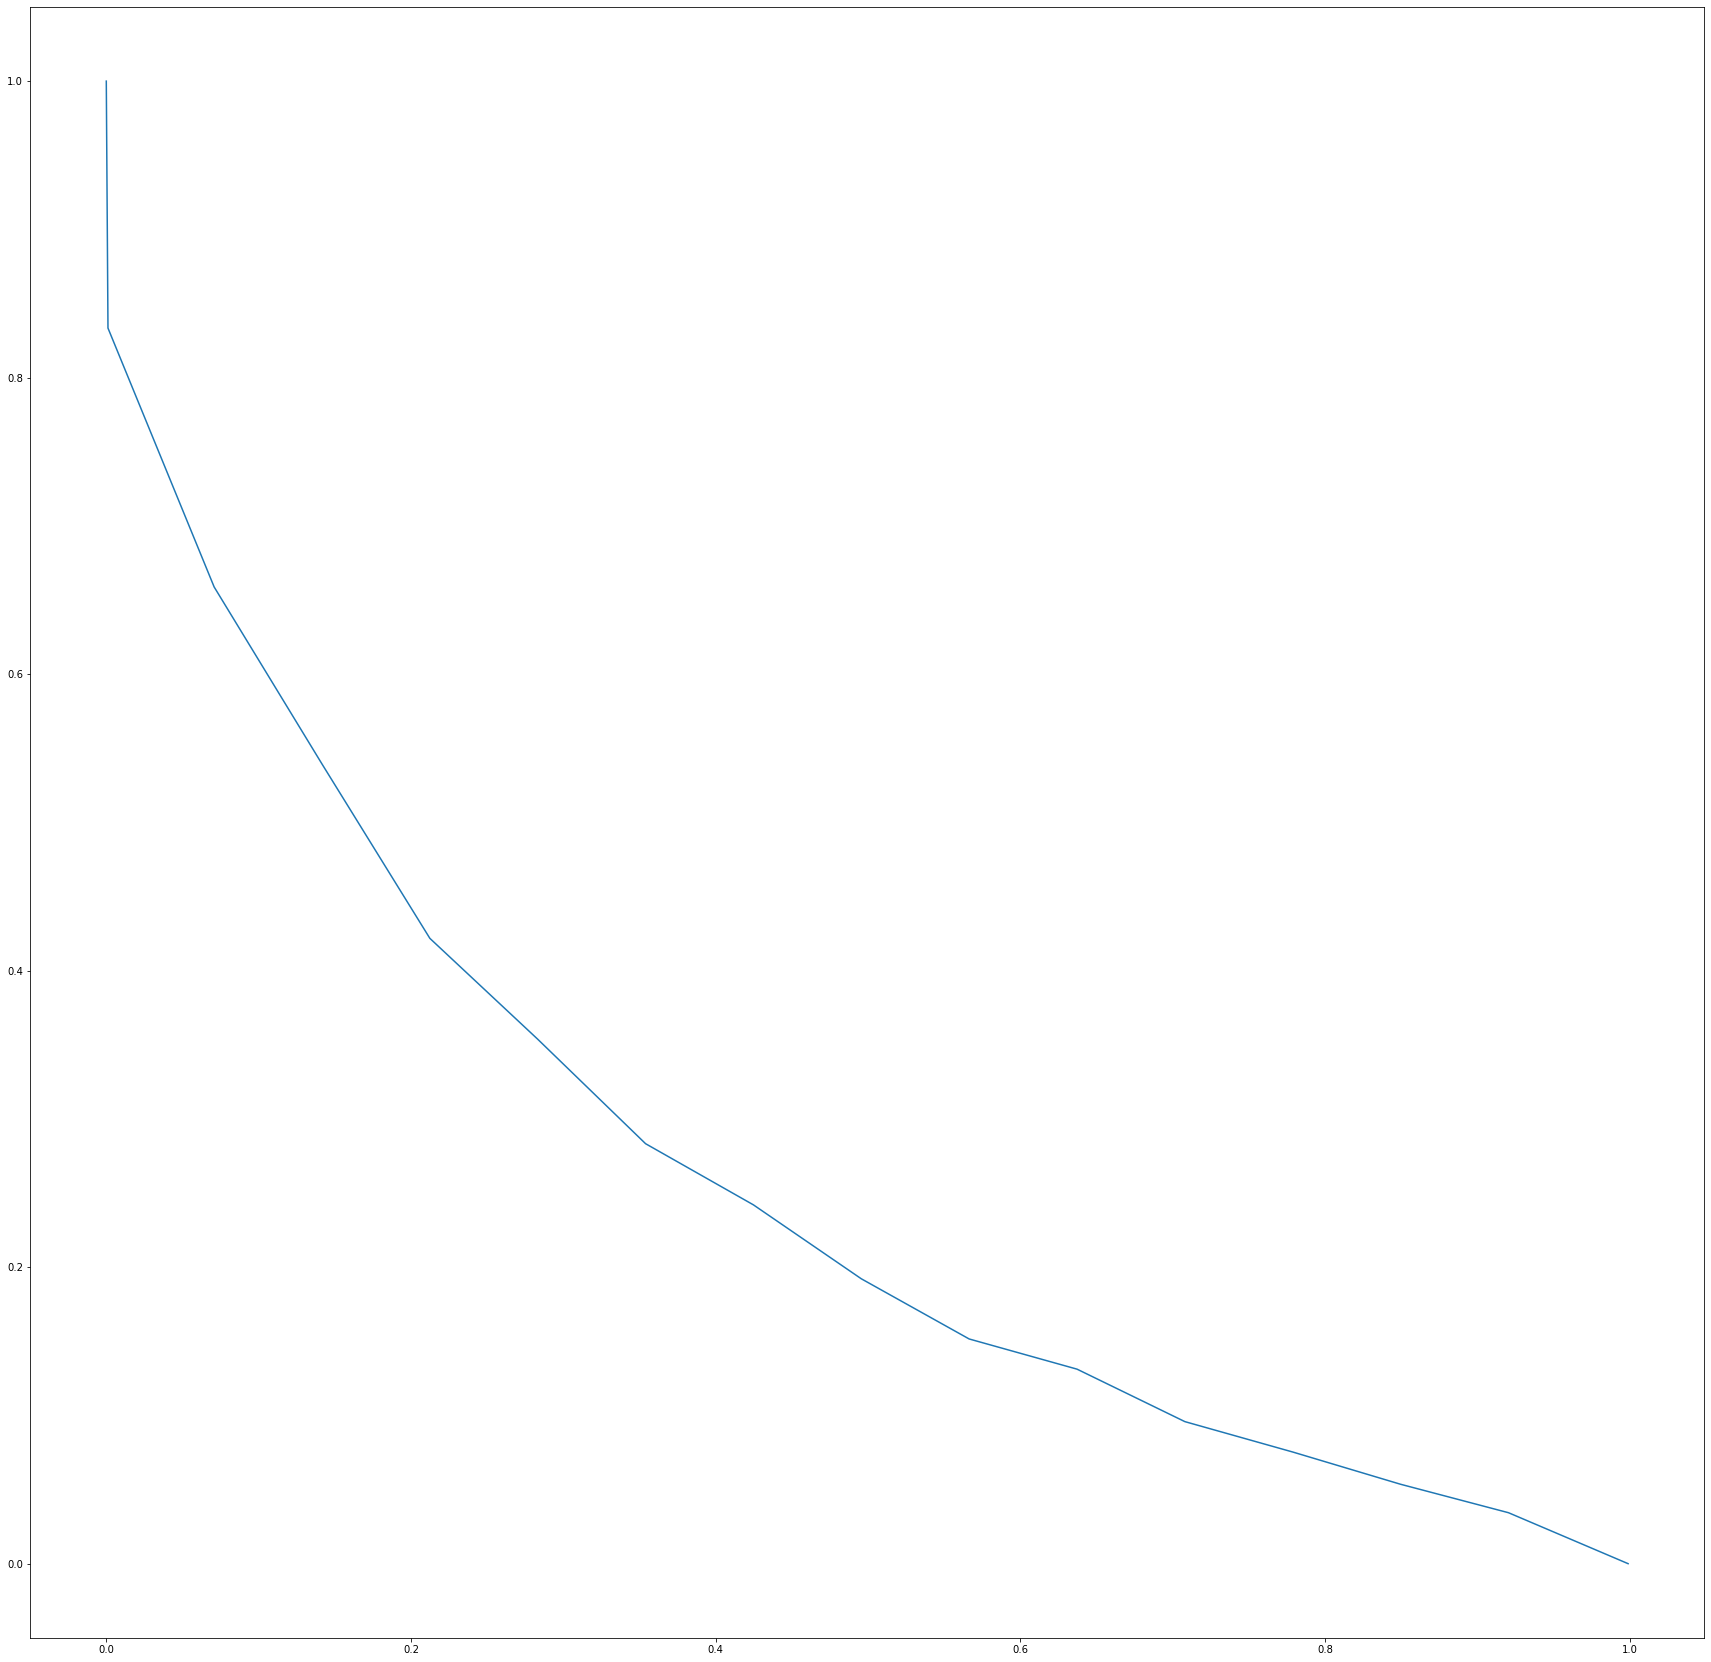

In [46]:
plt.plot(index_lst, s_lst)